## Open notebook in:
| Colab                               Gradient                                                                                                                                         |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nicolepcx/Transformers-in-Action/blob/main/CH06/ch06_image_classification_llama_4.ipynb)                                              

# About the notebook

This notebook demonstrates how to work with image inputs in Colab, combining basic visualization, file handling, and multimodal model interaction. We first show how to download and display an image locally using `PIL` and `matplotlib`. Then, we convert the image into a Base64 data URL and send it to an OpenAI-compatible API endpoint for analysis with a multimodal LLaMA-4 model. The workflow covers file validation, visualization, and structured model queries that include both image and text inputs, making it a practical example of how to build multimodal pipelines in Colab.


You need an API Key from [Novita AI](https://novita.ai/) to run the notebook's code.

# Dependencies

In [4]:
!pip install gdown==5.2.0 openai==1.106.1 -qqq

# Imports

In [ ]:
import os
import base64
from PIL import Image
import matplotlib.pyplot as plt
from openai import OpenAI
from pathlib import Path

# Visualize a local image

This helper function loads and displays an image from a given path.
It checks if the file exists, then uses PIL and matplotlib to render the image inline.

In [ ]:
def visualize_image_from_path(image_path: str) -> None:
    """Visualizes an image stored locally in Colab."""
    try:
        # Ensure the file exists
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found: {image_path}")

        # Open the image
        image = Image.open(image_path)

        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"Error visualizing image: {e}")


# Download an image from Google Drive
We use gdown to fetch an image file from Google Drive by its file ID
and store it locally under the specified filename.

In [ ]:
# Download the file from Google Drive using its file ID
file_id = "1o3NcE0yS4xdezJTdrPlmWBH2iKG__SLL"
destination = "ch06_statue-liberty-new-york-city-skyline-usa.jpg"
!gdown --id {file_id} -O {destination}

# Check if the file was downloaded
import os
if os.path.exists(destination):
    print(f"File downloaded successfully: {destination}")
else:
    print("Download failed.")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o3NcE0yS4xdezJTdrPlmWBH2iKG__SLL
To: /content/ch06_statue-liberty-new-york-city-skyline-usa.jpg
100% 465k/465k [00:00<00:00, 129MB/s]
File downloaded successfully: ch06_statue-liberty-new-york-city-skyline-usa.jpg


# Send the image to a multimodal LLaMA-4 model

To send the image to the multimodal model, we first convert it into a Base64-encoded data URL. This ensures the image can be embedded directly into the API request payload.

We configure the OpenAI client to use Novita's endpoint with an API key.
Make sure to replace `"your_API_key"` with your own credentials.
from openai import OpenAI.


 The image is passed to the model together with a text prompt asking
“What's in this image?”. The response is streamed and printed.

In [ ]:

def to_data_url(path: str, mime="image/jpeg") -> str:
    b64 = base64.b64encode(Path(path).read_bytes()).decode("utf-8")
    return f"data:{mime};base64,{b64}"

client = OpenAI(
    base_url="https://api.novita.ai/v3/openai",
    api_key="your_API_key",
)

image_path = "/content/ch06_statue-liberty-new-york-city-skyline-usa.jpg"
data_url = to_data_url(image_path, mime="image/jpeg")

resp = client.chat.completions.create(
    model="meta-llama/llama-4-scout-17b-16e-instruct",
    messages=[{
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {"url": data_url, "detail": "high"}
            },
            {"type": "text", "text": "What’s in this image?"}
        ]
    }],
    stream=True,             # works too with False
    max_tokens=1024,         # avoid huge values that some backends reject
    temperature=1,
    top_p=1,
    extra_body={"top_k": 50, "repetition_penalty": 1, "min_p": 0}
)

for chunk in resp:
    print(chunk.choices[0].delta.content or "", end="")


The iconic structure depicted here is none other than the Statue of Liberty, situated on Liberty Island in New York Harbor. The statue was a gift from France to the United States and is one of the most recognizable landmarks in the world. 

The statue was designed by French sculptor Frédéric Auguste Bartholdi and built by Gustave Eiffel. The statue depicts Libertas, the Roman goddess of freedom, holding a torch above her head with her right hand and a tablet that reads "JULY IV MDCCLXXVI" with her left hand, representing the law. A broken shackle and chain lie at her feet as she walks forward. 

Her official name is "Liberty Enlightening the World". The statue was dedicated on October 28, 1886, and it has since become a symbol of freedom and democracy. 

In this image, the Statue of Liberty can be seen from the side, showcasing its impressive size and intricate details, set against a bright blue sky with fluffy white clouds. The city skyline of Manhattan is also visible in the backgrou

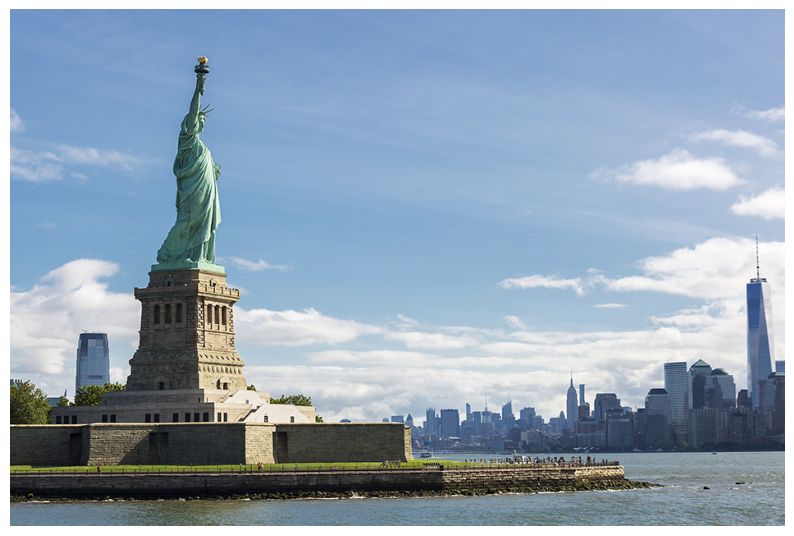

In [ ]:
visualize_image_from_path("/content/ch06_statue-liberty-new-york-city-skyline-usa.jpg")
